In [12]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
#from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from sklearn.feature_extraction.text import CountVectorizer #tfidf fonctionn aussi
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer


In [25]:
df_liens_fandom=pd.read_csv('../17.02_CSV.CSV/fandom_liens_date.csv')
df_fandom=pd.read_csv('../17.02_CSV.CSV/cp_fandom_scrapped.csv')

In [26]:
df_fandom_complete=df_fandom.join(df_liens_fandom)
df_fandom_complete

,Auteur,Texte,Category,Lien,Unnamed: 0,Links,date
0,[],So long as the oceans are the ligaments which ...,['[[Category:Historical Archive/PD]]'],https://creepypasta.fandom.com/wiki/%22De_Prof...,0,https://creepypasta.fandom.com/wiki/%22De_Prof...,30 September 2015
1,[],Though “Geraldine” Atkins was considered by ma...,"['[[Category:Dismemberment]]', '[[Category:Men...",https://creepypasta.fandom.com/wiki/%22Geraldi...,1,https://creepypasta.fandom.com/wiki/%22Geraldi...,11 January 2017
2,[],We are trapped within the darkest holes of our...,"['[[Category:Mental Illness]]', '[[Category:Mo...",https://creepypasta.fandom.com/wiki/%22Hate%22...,2,https://creepypasta.fandom.com/wiki/%22Hate%22,28 May 2013
3,[],Rica hated lack of hygiene.\n\nRica absolutely...,['[[Category:Ghosts]]'],https://creepypasta.fandom.com/wiki/%22I_Never...,3,https://creepypasta.fandom.com/wiki/%22I_Never...,13 November 2019
4,[],<gallery>\nFile:In the Broad Sense Written by ...,"['[[Category:Nature]]', '[[Category:Reality]]'...",https://creepypasta.fandom.com/wiki/%22In_the_...,4,https://creepypasta.fandom.com/wiki/%22In_the_...,7 October 2015
...,...,...,...,...,...,...,...
13123,[],[[File:Sombra siniestra.jpg|thumb|La Figura.]]...,"['[[Category:AltLang]]', '[[Category:NSFW]]', ...",https://creepypasta.fandom.com/wiki/%C2%BFEso_...,13123,https://creepypasta.fandom.com/wiki/%C2%BFEso_...,8 March 2013
13124,[],Leena Kujan led her men through the forest of ...,['[[Category:Monsters]]'],https://creepypasta.fandom.com/wiki/%CE%95%CE%...,13124,https://creepypasta.fandom.com/wiki/%CE%95%CE%...,12 May 2016
13125,[],[[File:Underwater ruins.jpg|thumb|290px]]\n<po...,"['[[Category:AltLang]]', '[[Category:Poetry]]'...",https://creepypasta.fandom.com/wiki/%CE%A4%CE%...,13125,https://creepypasta.fandom.com/wiki/%CE%A4%CE%...,16 May 2012
13126,[],Why do people go insane?\n\nMaybe one day we'l...,['[[Category:Mental Illness]]'],https://creepypasta.fandom.com/wiki/%E8%8B%A6%...,13126,https://creepypasta.fandom.com/wiki/%E8%8B%A6%...,2 April 2013


In [27]:
df_fandom_complete=df_fandom_complete.drop(columns='Unnamed: 0')
df_fandom_complete=df_fandom_complete.drop(columns='Links')

In [28]:
df_fandom_complete['Category'] = df_fandom_complete['Category'].apply(lambda x: re.findall(r'\[\[Category\:(.*?)\]\]', x))

In [33]:
df_fandom_complete["taille_texte"]=df_fandom_complete['Texte'].str.len()

In [46]:
def longueur_phrase_moyenne_mot(txt:str) : 
    #On découpe en phrase, puis on compte les mots
    liste_phrase=txt.split('.')

    taille_phrases=[len(phrase.split(' ')) for phrase in liste_phrase]
    
    return np.mean(taille_phrases) 


def taille_texte_mot(txt:str):
    return len(txt.split(' '))

In [58]:
def is_historical(cat) :
    if 'Historical Archive' in cat : 
        return 'TRUE'
    else :
        return 'FALSE'


yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay


In [60]:
df_fandom_complete['is_historical']=df_fandom_complete['Category'].apply(is_historical)
df_fandom_complete

,Auteur,Texte,Category,Lien,date,taille_texte,longueur_phrase_moyenne,taille_texte_mots,is_historical
0,[],So long as the oceans are the ligaments which ...,[Historical Archive/PD],https://creepypasta.fandom.com/wiki/%22De_Prof...,30 September 2015,13128,19.106977,3894,FALSE
1,[],Though “Geraldine” Atkins was considered by ma...,"[Dismemberment, Mental Illness, Music, NSFW]",https://creepypasta.fandom.com/wiki/%22Geraldi...,11 January 2017,13128,15.327160,4643,FALSE
2,[],We are trapped within the darkest holes of our...,"[Mental Illness, Monsters, Science]",https://creepypasta.fandom.com/wiki/%22Hate%22...,28 May 2013,13128,12.138340,2819,FALSE
3,[],Rica hated lack of hygiene.\n\nRica absolutely...,[Ghosts],https://creepypasta.fandom.com/wiki/%22I_Never...,13 November 2019,13128,11.628959,2350,FALSE
4,[],<gallery>\nFile:In the Broad Sense Written by ...,"[Nature, Reality, Videos, Killahawke1]",https://creepypasta.fandom.com/wiki/%22In_the_...,7 October 2015,13128,14.848485,915,FALSE
...,...,...,...,...,...,...,...,...,...
13123,[],[[File:Sombra siniestra.jpg|thumb|La Figura.]]...,"[AltLang, NSFW, Ritual, Demon/Devil]",https://creepypasta.fandom.com/wiki/%C2%BFEso_...,8 March 2013,13128,25.881818,2738,FALSE
13124,[],Leena Kujan led her men through the forest of ...,[Monsters],https://creepypasta.fandom.com/wiki/%CE%95%CE%...,12 May 2016,13128,18.055556,2457,FALSE
13125,[],[[File:Underwater ruins.jpg|thumb|290px]]\n<po...,"[AltLang, Poetry, Beings]",https://creepypasta.fandom.com/wiki/%CE%A4%CE%...,16 May 2012,13128,11.625000,86,FALSE
13126,[],Why do people go insane?\n\nMaybe one day we'l...,[Mental Illness],https://creepypasta.fandom.com/wiki/%E8%8B%A6%...,2 April 2013,13128,18.127273,943,FALSE


In [61]:
df_fandom_complete['taille_texte']=df_fandom_complete['Texte'].str.len()

In [66]:
df_fandom_complete['date']=pd.to_datetime(df_fandom_complete['date'])

In [69]:
df_fandom_complete['Date_Num'] = (df_fandom_complete['date'] - df_fandom_complete['date'].min()).dt.days

,Auteur,Texte,Category,Lien,date,taille_texte,longueur_phrase_moyenne,taille_texte_mots,is_historical,Date_Num
0,[],So long as the oceans are the ligaments which ...,[Historical Archive/PD],https://creepypasta.fandom.com/wiki/%22De_Prof...,2015-09-30,20493,19.106977,3894,FALSE,1879
1,[],Though “Geraldine” Atkins was considered by ma...,"[Dismemberment, Mental Illness, Music, NSFW]",https://creepypasta.fandom.com/wiki/%22Geraldi...,2017-01-11,27461,15.327160,4643,FALSE,2348
2,[],We are trapped within the darkest holes of our...,"[Mental Illness, Monsters, Science]",https://creepypasta.fandom.com/wiki/%22Hate%22...,2013-05-28,15399,12.138340,2819,FALSE,1024
3,[],Rica hated lack of hygiene.\n\nRica absolutely...,[Ghosts],https://creepypasta.fandom.com/wiki/%22I_Never...,2019-11-13,13230,11.628959,2350,FALSE,3384
4,[],<gallery>\nFile:In the Broad Sense Written by ...,"[Nature, Reality, Videos, Killahawke1]",https://creepypasta.fandom.com/wiki/%22In_the_...,2015-10-07,5208,14.848485,915,FALSE,1886
...,...,...,...,...,...,...,...,...,...,...
13123,[],[[File:Sombra siniestra.jpg|thumb|La Figura.]]...,"[AltLang, NSFW, Ritual, Demon/Devil]",https://creepypasta.fandom.com/wiki/%C2%BFEso_...,2013-03-08,14520,25.881818,2738,FALSE,943
13124,[],Leena Kujan led her men through the forest of ...,[Monsters],https://creepypasta.fandom.com/wiki/%CE%95%CE%...,2016-05-12,13848,18.055556,2457,FALSE,2104
13125,[],[[File:Underwater ruins.jpg|thumb|290px]]\n<po...,"[AltLang, Poetry, Beings]",https://creepypasta.fandom.com/wiki/%CE%A4%CE%...,2012-05-16,833,11.625000,86,FALSE,647
13126,[],Why do people go insane?\n\nMaybe one day we'l...,[Mental Illness],https://creepypasta.fandom.com/wiki/%E8%8B%A6%...,2013-04-02,5079,18.127273,943,FALSE,968


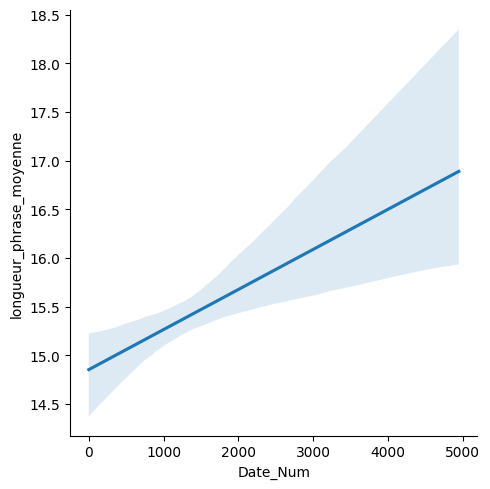

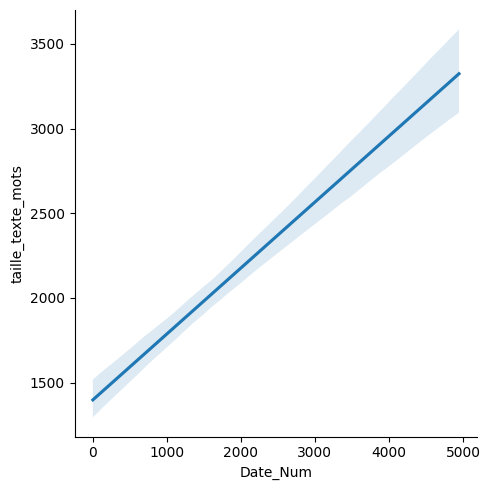

In [76]:
sns.lmplot(df_fandom_complete,x='Date_Num',y='longueur_phrase_moyenne',scatter=False)
sns.lmplot(df_fandom_complete,x='Date_Num',y='taille_texte_mots',scatter=False)
plt.show()


In [81]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np



def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)



df=df_fandom_complete



historical_texts = df[df['is_historical']=='TRUE']['taille_texte_mots']
non_historical_texts = df[df['is_historical']=='FALSE']['taille_texte_mots']

# Effectuer le test de Mann-Whitney
u_statistic, p_value = mannwhitneyu(historical_texts, non_historical_texts)
d_value=cohen_d(historical_texts,non_historical_texts)

# Afficher les résultats

print('Statistique U:', u_statistic)
print('Valeur p:', p_value)
print('d de Cohen:', d_value)

# Interprétation

if p_value < 0.05:
    print("Il y a une différence significative entre les longueurs des textes historiques et non historiques.")
else:
    print("Il n'y a pas de différence significative entre les longueurs des textes historiques et non historiques.")


# Interprétation de d de Cohen
    
if d_value < 0.2:
    print('Très petit effet.')
elif d_value < 0.5:
    print('Petit effet.')
elif d_value < 0.8:
    print('Effet moyen.')
else:
    print('Grand effet.')

Statistique U: 1772411.5
Valeur p: 4.1400113150734545e-47
d de Cohen: -0.1838413701235031
Il y a une différence significative entre les longueurs des textes historiques et non historiques.
Très petit effet.


In [82]:
df_fandom_complete.to_csv('../17.02_CSV.CSV/cp_fandom_complet.csv')

In [5]:
#Charger le document
file='../17.02_CSV.CSV/cp_fandom_complet.csv'
data=pd.read_csv(file)

In [4]:
data

,Unnamed: 0,Auteur,Texte,Category,Lien,date,taille_texte,longueur_phrase_moyenne,taille_texte_mots,is_historical,Date_Num
0,0,[],So long as the oceans are the ligaments which ...,['Historical Archive/PD'],https://creepypasta.fandom.com/wiki/%22De_Prof...,2015-09-30,20493,19.106977,3894,False,1879
1,1,[],Though “Geraldine” Atkins was considered by ma...,"['Dismemberment', 'Mental Illness', 'Music', '...",https://creepypasta.fandom.com/wiki/%22Geraldi...,2017-01-11,27461,15.327160,4643,False,2348
2,2,[],We are trapped within the darkest holes of our...,"['Mental Illness', 'Monsters', 'Science']",https://creepypasta.fandom.com/wiki/%22Hate%22...,2013-05-28,15399,12.138340,2819,False,1024
3,3,[],Rica hated lack of hygiene.\n\nRica absolutely...,['Ghosts'],https://creepypasta.fandom.com/wiki/%22I_Never...,2019-11-13,13230,11.628959,2350,False,3384
4,4,[],<gallery>\nFile:In the Broad Sense Written by ...,"['Nature', 'Reality', 'Videos', 'Killahawke1']",https://creepypasta.fandom.com/wiki/%22In_the_...,2015-10-07,5208,14.848485,915,False,1886
...,...,...,...,...,...,...,...,...,...,...,...
13123,13123,[],[[File:Sombra siniestra.jpg|thumb|La Figura.]]...,"['AltLang', 'NSFW', 'Ritual', 'Demon/Devil']",https://creepypasta.fandom.com/wiki/%C2%BFEso_...,2013-03-08,14520,25.881818,2738,False,943
13124,13124,[],Leena Kujan led her men through the forest of ...,['Monsters'],https://creepypasta.fandom.com/wiki/%CE%95%CE%...,2016-05-12,13848,18.055556,2457,False,2104
13125,13125,[],[[File:Underwater ruins.jpg|thumb|290px]]\n<po...,"['AltLang', 'Poetry', 'Beings']",https://creepypasta.fandom.com/wiki/%CE%A4%CE%...,2012-05-16,833,11.625000,86,False,647
13126,13126,[],Why do people go insane?\n\nMaybe one day we'l...,['Mental Illness'],https://creepypasta.fandom.com/wiki/%E8%8B%A6%...,2013-04-02,5079,18.127273,943,False,968


In [6]:
data_filtered=data[data["Texte"].apply(lambda x : isinstance(x,str) and len(x)>300)]
data_filtered

,Unnamed: 0,Auteur,Texte,Category,Lien,date,taille_texte,longueur_phrase_moyenne,taille_texte_mots,is_historical,Date_Num
0,0,[],So long as the oceans are the ligaments which ...,['Historical Archive/PD'],https://creepypasta.fandom.com/wiki/%22De_Prof...,2015-09-30,20493,19.106977,3894,False,1879
1,1,[],Though “Geraldine” Atkins was considered by ma...,"['Dismemberment', 'Mental Illness', 'Music', '...",https://creepypasta.fandom.com/wiki/%22Geraldi...,2017-01-11,27461,15.327160,4643,False,2348
2,2,[],We are trapped within the darkest holes of our...,"['Mental Illness', 'Monsters', 'Science']",https://creepypasta.fandom.com/wiki/%22Hate%22...,2013-05-28,15399,12.138340,2819,False,1024
3,3,[],Rica hated lack of hygiene.\n\nRica absolutely...,['Ghosts'],https://creepypasta.fandom.com/wiki/%22I_Never...,2019-11-13,13230,11.628959,2350,False,3384
4,4,[],<gallery>\nFile:In the Broad Sense Written by ...,"['Nature', 'Reality', 'Videos', 'Killahawke1']",https://creepypasta.fandom.com/wiki/%22In_the_...,2015-10-07,5208,14.848485,915,False,1886
...,...,...,...,...,...,...,...,...,...,...,...
13123,13123,[],[[File:Sombra siniestra.jpg|thumb|La Figura.]]...,"['AltLang', 'NSFW', 'Ritual', 'Demon/Devil']",https://creepypasta.fandom.com/wiki/%C2%BFEso_...,2013-03-08,14520,25.881818,2738,False,943
13124,13124,[],Leena Kujan led her men through the forest of ...,['Monsters'],https://creepypasta.fandom.com/wiki/%CE%95%CE%...,2016-05-12,13848,18.055556,2457,False,2104
13125,13125,[],[[File:Underwater ruins.jpg|thumb|290px]]\n<po...,"['AltLang', 'Poetry', 'Beings']",https://creepypasta.fandom.com/wiki/%CE%A4%CE%...,2012-05-16,833,11.625000,86,False,647
13126,13126,[],Why do people go insane?\n\nMaybe one day we'l...,['Mental Illness'],https://creepypasta.fandom.com/wiki/%E8%8B%A6%...,2013-04-02,5079,18.127273,943,False,968


In [9]:
texte=data_filtered['Texte'].tolist()


13118

In [58]:
nltk.download('stopwords')
en_stop=stopwords.words('english')
en_stop.append('like')
print(len(en_stop))

180


[nltk_data] Downloading package stopwords to /Users/rolly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
sw=[]
for i in en_stop : 
    if "'" in i : 
        sw.append(i.replace("'",''))
    else : 
        sw.append(i)
print(sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [55]:
print(en_stop)

['youre', 'youve', 'youll', 'youd', 'shes', 'its', 'thatll', 'dont', 'shouldve', 'arent', 'couldnt', 'didnt', 'doesnt', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shouldnt', 'wasnt', 'werent', 'wont', 'wouldnt']


In [29]:
vectorizer_model=CountVectorizer(stop_words=en_stop,ngram_range=(1,2))

model= BERTopic(
    vectorizer_model=vectorizer_model,
    language='english',
    calculate_probabilities=True,
    verbose=True
)


In [30]:
topics, probs = model.fit_transform(texte)

2024-03-04 15:57:00,360 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 410/410 [02:32<00:00,  2.69it/s]
2024-03-04 15:59:39,032 - BERTopic - Embedding - Completed ✓
2024-03-04 15:59:39,032 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-04 15:59:42,953 - BERTopic - Dimensionality - Completed ✓
2024-03-04 15:59:42,954 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-04 15:59:46,247 - BERTopic - Cluster - Completed ✓
2024-03-04 15:59:46,249 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-04 16:00:40,804 - BERTopic - Representation - Completed ✓


In [31]:
topic_3=model.visualize_barchart()

In [32]:
topic_3

In [25]:
topic_2=model.visualize_barchart()

In [33]:
topic_2


In [12]:
topic_1=model.visualize_barchart()

In [34]:
topic_1

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=1)

In [71]:
from collections import Counter
import math

def calculate_idf(documents):
    """
    Calculate IDF (Inverse Document Frequency) for terms in documents.
    """
    idf_values = {}
    total_documents = len(documents)

    # Count the number of documents containing each term
    document_frequency = Counter()
    for document in documents:
        document=document.lower()
        unique_terms = set(document.split())  # Split document into words
        for term in unique_terms:
            document_frequency[term] += 1

    # Calculate IDF for each term
    for term, freq in document_frequency.items():
        idf_values[term] = math.log(total_documents / (freq + 1))  # Add 1 to avoid division by zero

    return idf_values

def build_stopword_list(documents, most_freq_count, least_freq_count, low_idf_threshold):
    """
    Build a custom stop word list from a corpus using most frequent words, least frequent words,
    and terms with low IDF values.
    """
    # Count term frequencies
    term_freq = Counter()
    for document in documents:
        document=document.lower()
        term_freq.update(document.split())  # Split document into words

    # Find the most frequent and least frequent words
    most_freq_words = [word for word, _ in term_freq.most_common(most_freq_count)]
    least_freq_words = [word for word, _ in term_freq.most_common()[-least_freq_count:]]

    # Calculate IDF values
    idf_values = calculate_idf(documents)

    # Find terms with low IDF values
    low_idf_words = [term for term, idf in idf_values.items() if idf < low_idf_threshold]

    # Combine all stop words
    stop_words = set(most_freq_words + least_freq_words + low_idf_words)

    return stop_words

# Example corpus (list of documents)
corpus = texte
# Parameters for stop word list construction
most_freq_count = 100
least_freq_count = 100
low_idf_threshold = 0.5

# Build custom stop word list
custom_stopwords = build_stopword_list(corpus, most_freq_count, least_freq_count, low_idf_threshold)

print("Custom Stop Words:")
print(custom_stopwords)


Custom Stop Words:
{'hitchhike,”', 'are', 'when', 'then', 'got', 'as', 'this', 'said', 'over', 'menshen,', '“busy.”', 'taban,', 'any', 'could', 'after', 'had', 'πέρασε', 'would', 'garan,', 'dr.martanik', 'down', 'suzan.', 'me', 'θανάτου', 'out', 'geriel!”', 'παραπλανεί,', 'something', 'daq,', 'her', '“bataar!”', 'muddy-colored,', 'λαό', 'crook.”', 'μέσα', 'bataar,', 'they', "''3:00am.''", 'dongsheng,', 'how', 'or', 'before', 'the', 'ruins.jpg|thumb|290px]]', 'rowboat’s', 'other', 'erlik?', 'some', 'all', 'at', 'desert,”', 'erlik’s', 'do', 'carousel!”', 'she', 'his', 'still', '“あなたは、来世での幸せを見つけることができる.”(may', 'what', "palaces'''''", 'were', "[[file:erlik's", 'one', 'bethlam', 'armoured.', 'your', 'recommendations?”', 'bataar’s.', '{{sort|σκοτεινά', 'στα', 'deel.', 'καιρός,', 'erlik?”', 'of', 'not', 'john…”', 'a', 'ordos?”', 'geriel,”', 'itami,', 'kangbashi', 'i', 'made', 'we', 'μα', 'afterlife)', 'have', 'up', 'saw', 'λυσσομανεί,', 'no', 'ordos,', 'escaped?!”', 'αν', 'through', 'keylans,

In [72]:
#mélanger plusieurs listes de stop words: 
stop_words_custom=[i for i in en_stop if i not in custom_stopwords]
sw=list(custom_stopwords)
sw.extend(stop_words_custom)

In [75]:
sw_2=[]
for i in sw : 
    if "'" in i : 
        sw_2.append(i.replace("'",''))
    else : 
        sw_2.append(i)
print(sw_2)

['hitchhike,”', 'are', 'when', 'then', 'got', 'as', 'this', 'said', 'over', 'menshen,', '“busy.”', 'taban,', 'any', 'could', 'after', 'had', 'πέρασε', 'would', 'garan,', 'dr.martanik', 'down', 'suzan.', 'me', 'θανάτου', 'out', 'geriel!”', 'παραπλανεί,', 'something', 'daq,', 'her', '“bataar!”', 'muddy-colored,', 'λαό', 'crook.”', 'μέσα', 'bataar,', 'they', '3:00am.', 'dongsheng,', 'how', 'or', 'before', 'the', 'ruins.jpg|thumb|290px]]', 'rowboat’s', 'other', 'erlik?', 'some', 'all', 'at', 'desert,”', 'erlik’s', 'do', 'carousel!”', 'she', 'his', 'still', '“あなたは、来世での幸せを見つけることができる.”(may', 'what', 'palaces', 'were', '[[file:erliks', 'one', 'bethlam', 'armoured.', 'your', 'recommendations?”', 'bataar’s.', '{{sort|σκοτεινά', 'στα', 'deel.', 'καιρός,', 'erlik?”', 'of', 'not', 'john…”', 'a', 'ordos?”', 'geriel,”', 'itami,', 'kangbashi', 'i', 'made', 'we', 'μα', 'afterlife)', 'have', 'up', 'saw', 'λυσσομανεί,', 'no', 'ordos,', 'escaped?!”', 'αν', 'through', 'keylans,', 'know', 'death-curdled', '

In [68]:
sw.extend(['would','could','back','im'])

In [69]:
sw

['hitchhike,”',
 'let',
 'are',
 'when',
 'then',
 'got',
 'head',
 'same',
 'as',
 'this',
 'said',
 'over',
 'menshen,',
 '“busy.”',
 'taban,',
 'any',
 'could',
 'after',
 'had',
 'πέρασε',
 'would',
 'garan,',
 'dr.martanik',
 'down',
 'found',
 'suzan.',
 'me',
 'θανάτου',
 'out',
 'geriel!”',
 'παραπλανεί,',
 'something',
 'daq,',
 'her',
 'behind',
 'went',
 '“bataar!”',
 'face',
 'next',
 'muddy-colored,',
 'come',
 'λαό',
 'crook.”',
 'μέσα',
 'started',
 'man',
 'they',
 'bataar,',
 '3:00am.',
 'dongsheng,',
 'how',
 'or',
 'before',
 'the',
 'ruins.jpg|thumb|290px]]',
 'too',
 'other',
 'thought',
 'rowboat’s',
 'while',
 'dont',
 'erlik?',
 'some',
 'all',
 'at',
 'few',
 'desert,”',
 'erlik’s',
 'do',
 'carousel!”',
 'she',
 'his',
 'still',
 'until',
 '“あなたは、来世での幸せを見つけることができる.”(may',
 'what',
 'right',
 'im',
 'palaces',
 'feel',
 'were',
 '[[file:erliks',
 'one',
 'take',
 'bethlam',
 'armoured.',
 'your',
 'recommendations?”',
 'bataar’s.',
 'door',
 'στα',
 '{{sort|σκο

In [76]:
vectorizer_model=CountVectorizer(stop_words=list(sw_2),ngram_range=(1,2),)

model= BERTopic(
    vectorizer_model=vectorizer_model,
    language='english',
    calculate_probabilities=True,
    verbose=True
)

topics, probs = model.fit_transform(texte)

model.visualize_barchart()

2024-03-05 10:45:19,576 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 410/410 [02:29<00:00,  2.74it/s]
2024-03-05 10:47:54,721 - BERTopic - Embedding - Completed ✓
2024-03-05 10:47:54,721 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-05 10:47:58,024 - BERTopic - Dimensionality - Completed ✓
2024-03-05 10:47:58,025 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-05 10:48:01,261 - BERTopic - Cluster - Completed ✓
2024-03-05 10:48:01,264 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-05 10:48:54,259 - BERTopic - Representation - Completed ✓
